In [1]:
import pandas as pd
import numpy as np
import ast
import collections as c
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
convs=pd.read_csv('../data/bbAllFullConvos.csv',sep=';')

/home/mako0970/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (37,38,39,41,42,43,45,46,47,49,50,51,53,54,55,57,58,59,61,62,63,65,66,67,69,70,71,73,74,75,77,78,79,81,82,83,85,86,87,89,90,91,93,94,95,97,98,99,101,102,103,105,106,107,109,110,111,113,114,115,117,118,119,121,122,123,125,126,127,129,130,131,133,134,135,137,138,139,141,142,143,145,146,147,149,150,151,153,154,155,157,158,159,161,162,163,165,166,167,169,170,171,173,174,175) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
convs['convoLen']=(pd.to_datetime(convs.convoEndTime)-pd.to_datetime(convs.date0)).apply(lambda x: x.item()/(10**9))

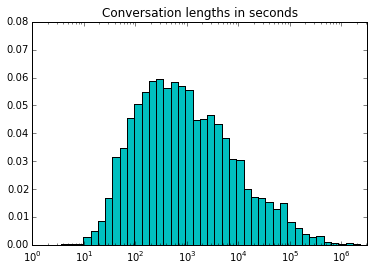

In [5]:
convoLen = convs.convoLen.dropna().tolist()
bins=np.logspace(0, int(np.log(max(convoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(convoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Conversation lengths in seconds')

In [6]:
np.median(convoLen)

733.0

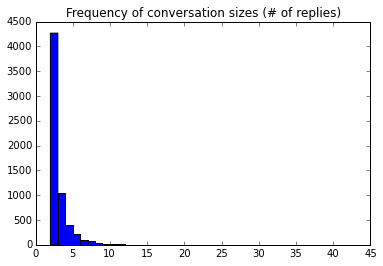

In [7]:
plt.hist(convs.convSize,42)
plt.title('Frequency of conversation sizes (# of replies)')

In [25]:
np.median(convs.convSize)

2.0

In [253]:
np.percentile(convs.convSize, 90)

4.0

In [8]:
convs.allNames=convs.allNames.apply(lambda x: ast.literal_eval(x))

In [9]:
convs['userSetLen']=convs.allNames.apply(lambda x: len(x))

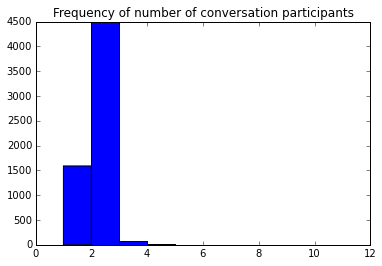

In [10]:
plt.hist(convs.userSetLen,10)
plt.title('Frequency of number of conversation participants')

In [26]:
np.median(convs.userSetLen)

2.0

In [244]:
np.percentile(convs.userSetLen, 90)

2.0

In [38]:
max(convs.userSetLen)

11

### Average time between successive replies whithin a conversation

In [104]:
convs['avgTimePerReply']=convs.convoLen/(convs.convSize-1)

convs.convoLen/(convs.convSize-1) makes it more consistent w/ **repSecDiff** in bbInterReplyTimingAnalysis

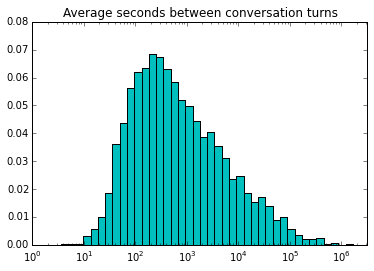

In [105]:
avgTime=convs.avgTimePerReply.dropna().tolist()
bins=np.logspace(0, int(np.log(max(avgTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(avgTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Average seconds between conversation turns')

In [106]:
np.median(avgTime)

490.0

In [260]:
before=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-15 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-10-25 00:00:00'))]

In [261]:
during=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-25 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-04 00:00:00'))]

In [262]:
after=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-04 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-14 00:00:00'))]

In [263]:
lafter=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-14 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-11-23 00:00:00'))]

In [264]:
len(before)

815

In [265]:
len(during)

2069

In [266]:
len(after)

1450

In [267]:
len(lafter)

879

In [268]:
len(before)+len(during)+len(after)+len(lafter)

5213

964 conversations don't fit these time periods - span more than one or last longer than long after

# Before

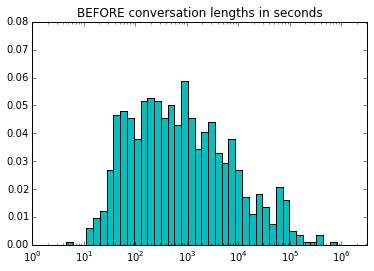

In [269]:
bConvoLen=before.convoLen.dropna().tolist()
bins=np.logspace(0, int(np.log(max(bConvoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(bConvoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title(('BEFORE conversation lengths in seconds'))

In [270]:
np.median(bConvoLen)

650.0

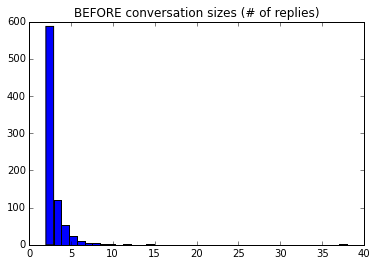

In [272]:
plt.hist(before.convSize.tolist(),39)
plt.title('BEFORE conversation sizes (# of replies)')

In [273]:
np.median(before.convSize)

2.0

In [274]:
np.percentile(before.convSize, 90)

4.0

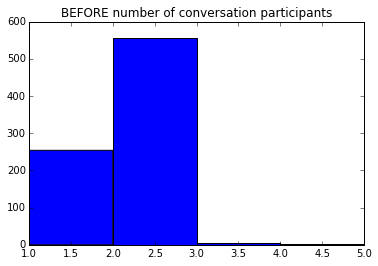

In [276]:
plt.hist(before.userSetLen.tolist(),4)
plt.title('BEFORE number of conversation participants')

In [277]:
np.median(before.userSetLen)

2.0

In [278]:
np.percentile(before.userSetLen, 90)

2.0

In [279]:
max(before.userSetLen)

5

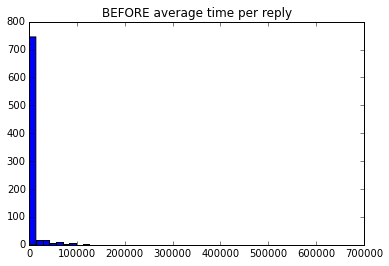

In [281]:
plt.hist(before.avgTimePerReply.tolist(), 50)
plt.title('BEFORE average time per reply')

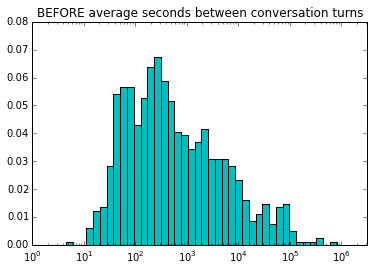

In [282]:
bAvgRepTime=before.avgTimePerReply.dropna().tolist()
bins=np.logspace(0, int(np.log(max(bAvgRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(bAvgRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('BEFORE average seconds between conversation turns')

Or should it plot on the loglog? Checked it - not interesting, not high enough

In [283]:
np.median(bAvgRepTime)

388.0

# During

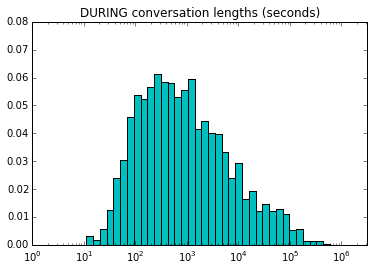

In [284]:
dConvoLen=during.convoLen.dropna().tolist()
bins=np.logspace(0, int(np.log(max(dConvoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(dConvoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('DURING conversation lengths (seconds)')

In [285]:
np.median(dConvoLen)

701.0

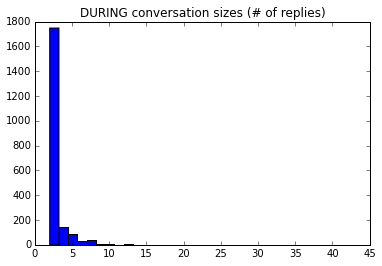

In [286]:
plt.hist(during.convSize.tolist(),33)
plt.title('DURING conversation sizes (# of replies)')

In [287]:
np.median(during.convSize)

2.0

In [288]:
np.percentile(during.convSize, 90)

4.0

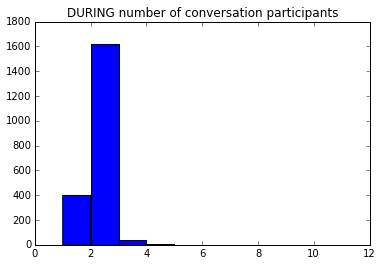

In [289]:
plt.hist(during.userSetLen.tolist(),10)
plt.title('DURING number of conversation participants')

In [290]:
np.median(during.userSetLen)

2.0

In [291]:
np.percentile(during.userSetLen,90)

2.0

In [292]:
max(during.userSetLen)

11

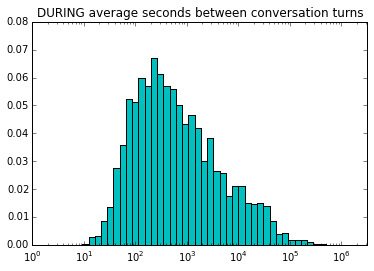

In [293]:
dAvgRepTime=during.avgTimePerReply.dropna().tolist()
bins=np.logspace(0, int(np.log(max(dAvgRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(dAvgRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('DURING average seconds between conversation turns')

In [294]:
np.median(dAvgRepTime)

466.0

Represent the medians for the convoLen and avgReplyTime as boxplots? This is local only, include both local and global?

# After

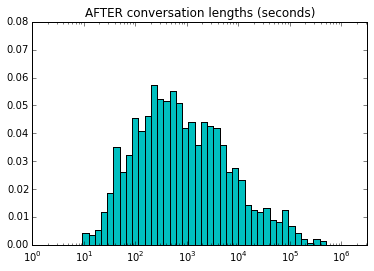

In [295]:
aConvoLen=after.convoLen.dropna().tolist()
bins=np.logspace(0, int(np.log(max(aConvoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(aConvoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('AFTER conversation lengths (seconds)')

In [296]:
np.median(aConvoLen)

664.5

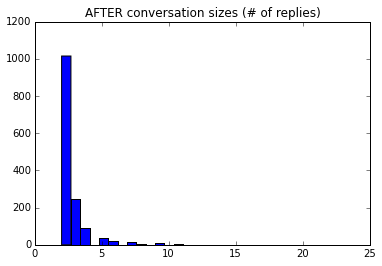

In [297]:
plt.hist(after.convSize.tolist(),33)
plt.title('AFTER conversation sizes (# of replies)')

In [298]:
np.median(after.convSize.tolist())

2.0

In [299]:
np.percentile(after.convSize, 90)

4.0

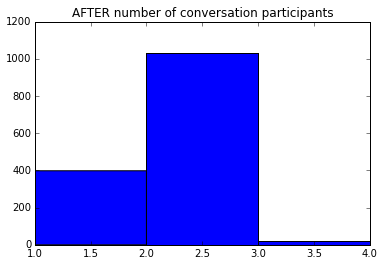

In [300]:
plt.hist(after.userSetLen.tolist(),3)
plt.title('AFTER number of conversation participants')

In [301]:
np.median(after.userSetLen)

2.0

In [302]:
np.percentile(after.userSetLen, 90)

2.0

In [303]:
max(after.userSetLen)

4

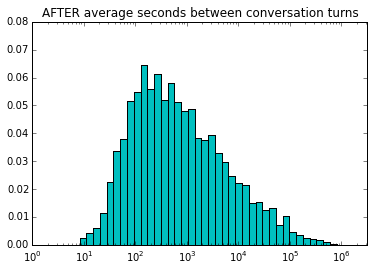

In [226]:
aAvgRepTime=after.avgTimePerReply.dropna().tolist()
bins=np.logspace(0, int(np.log(max(aAvgRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(aAvgRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('AFTER average seconds between conversation turns')

In [115]:
np.median(aAvgRepTime)

521.75

** Do ANOVA on medians? Non-parametric version of ANOVA test?**

I guess it depends on who's talking. If it's the same people - then **repeated measures**. Otherwise, **Kruskal-Wallis**
https://en.wikipedia.org/wiki/Kruskal%E2%80%93Wallis_one-way_analysis_of_variance

**Important points:**
* the medians of average between-reply times w/in conversations are higher than median of inter-reply times in general
* this is because inter-reply times distrbiution is quite skewed and long-tailed, so averaging icorporates more of those bigger values
* the question is then: are inter-reply times w/in each conversation also skewed and long-tailed? Or does each conversation has a somehwat consistent temporal rhythm/signature?
* to investigate this, for each non-branching convo - calculate mean, median, sd, and range of inter-reply time
* for the branching conversations, only do that for consequitive segments?

# Further within conversation analysis

In [251]:
convs['longTailed']=0 

In [234]:
#made-up: max - median (2nd 50% of dist) is more than twice the median (1st 50% of dist)
def longTailed(row):
    timeDiff=[]
    for i in range(1,44): #start from one b/c subtracting the previous tweet's time
        colName='date'+str(i)
        if str(row[colName])!='0':
            if ((pd.to_datetime(row[colName])>pd.to_datetime(row['date'+str(i-1)]))):#for branching convos!!!!
                t=(pd.to_datetime(row[colName])-pd.to_datetime(row['date'+str(i-1)])).seconds
                timeDiff.append(t)
    return np.median(timeDiff) < 2*(max(timeDiff)-np.median(timeDiff))

In [238]:
convs['longTailed']=convs.apply(longTailed, axis=1)

In [240]:
sum(convs.longTailed)/float(len(convs))

0.21466731423020885

In [189]:
before=convs[pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-10-27 00:00:00')]

In [190]:
during=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-27 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<=pd.to_datetime('2012-11-04 11:59:59'))]

In [191]:
after=convs[pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-05 00:00:00')]

In [192]:
sum(before.longTailed)/float(len(before))

0.19157720891824939

In [193]:
sum(during.longTailed)/float(len(during))

0.22274143302180685

In [194]:
sum(after.longTailed)/float(len(after))

0.21334259902710215

** Takeway:**
* so there is no differnce (we can check Chi-square)
* that means that the difference in average inter-reply time is not because less convos during have long-tailed dists
* this must mean that during all the tweets in the convos are shorter (both short and very long reply times)

In [206]:
convs['medianReplyTime']=0

In [207]:
def medRep(row):
    timeDiff=[]
    for i in range(1,44): #start from one b/c subtracting the previous tweet's time
        colName='date'+str(i)
        if str(row[colName])!='0':
            if ((pd.to_datetime(row[colName])>pd.to_datetime(row['date'+str(i-1)]))):#for branching convos!!!!
                t=(pd.to_datetime(row[colName])-pd.to_datetime(row['date'+str(i-1)])).seconds
                timeDiff.append(t)
    return np.median(timeDiff)

In [208]:
convs['medianReplyTime']=convs.apply(medRep, axis=1)

In [258]:
np.median(convs.medianReplyTime)

445.0

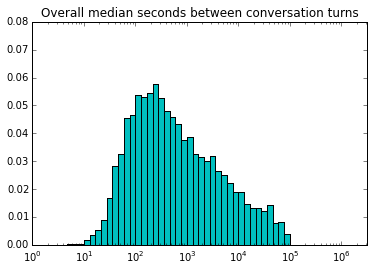

In [259]:
medRepTime=convs.medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(medRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(medRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Overall median seconds between conversation turns')

In [211]:
before=convs[pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-10-27 00:00:00')]

In [212]:
during=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-27 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<=pd.to_datetime('2012-11-04 11:59:59'))]

In [213]:
after=convs[pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-05 00:00:00')]

In [215]:
np.median(before.medianReplyTime)

417.0

In [216]:
np.median(during.medianReplyTime)

402.75

In [217]:
np.median(after.medianReplyTime)

459.0

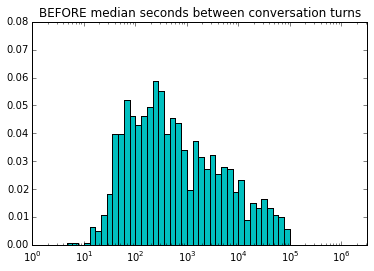

In [230]:
bMedRepTime=before.medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(bMedRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(bMedRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('BEFORE median seconds between conversation turns')

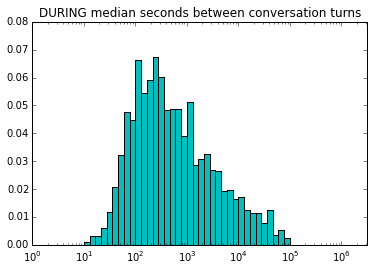

In [231]:
dMedRepTime=during.medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(dMedRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(dMedRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('DURING median seconds between conversation turns')

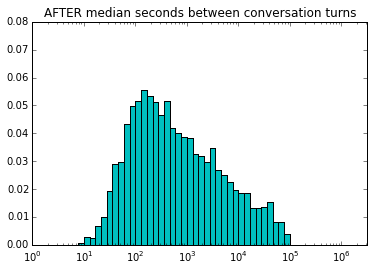

In [232]:
aMedRepTime=after.medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(aMedRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(aMedRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('AFTER median seconds between conversation turns')

** Takeaway:**
* So it seems like indeed, on average, conversations in during period go a bit faster than before and especially after

# Branching

In [218]:
sum(convs.branching)/float(len(convs))

0.059575845879876965

In [219]:
sum(before.branching)/float(len(before))

0.04376548307184145

In [220]:
sum(during.branching)/float(len(during))

0.070612668743509868

In [221]:
sum(after.branching)/float(len(after))

0.056289089645587216

** Takeway:**
* So there are slightly more branching conversations during than before and after
* Is this because more people are involved? NO!!!
* We show above that in all time periods median number of people in convos is 2
* Although during has a higher maximum # of users in a convo (5, 11, 4 respectively)

In [241]:
convs.to_csv('../data/bbAllFullConvosMore.csv',sep=';')